In [1]:
#importing required libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import model_selection

# Import scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# Plots
import matplotlib.pyplot as plt

In [2]:
#creating a class for scaler
class DummyScaler:
    def fit(self, data):
        pass
    def transform(self, data):
        return data

In [3]:
seed = 520
np.set_printoptions(precision=5)    

Use the pendigits dataset on the Canvas site. Partition the data randomly into 50% train and 50% test subsets.

In [4]:
#reading the csv file pendigits.csv and splitting the data into training and testing data as 50% and 50%
X = pd.read_csv('pendigits.csv')
X_train, X_test = model_selection.train_test_split(X, test_size=0.5, random_state=seed, shuffle=True)

In [5]:
#printing the features
print('Features:', X_train, sep='\n')

Features:
       x0   x1  x2   x3   x4  x5   x6   x7   x8  x9  x10  x11  x12  x13  x14  \
3495   54   97  20   73   48  34   35    0    0  22   50   50  100   78   71   
7482    0   49  40   59   72  79  100  100   85  74   69   48   53   21   51   
3729   74  100  28   78    0  52    0   24   37   0  100    6   76   26   13   
3560   37   94  44   57   94  99   28  100   53  73  100   64   75    7    0   
762   100  100  59   82   31  56   17   27   35   0   83    0   49   16    0   
...   ...  ...  ..  ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...  ...   
5359   55  100  33   83    0  53   40   39  100  47   90   60   48   32   23   
2772   40  100  11   87    0  57   11   29   66  40  100   58   82   29   78   
411    72   83  49  100   61  58   82   17    0   0   25   33  100   61   75   
3691    0   87  39  100   61  70   47   27   36   0   11   33   55   35  100   
6828   28   83  66  100  100  86   81   60   94  43   96   18   54    0    0   

      x15  
3495  100  
7482 

In [10]:
#function to calculate SSE given distances from new data set with fixed cluster centers from a previous data set min function finds the closest cluster
def getSSE(what, dists):
  dists = dists.min(axis=1)
  # square the distances
  dists_sq = dists*dists
  print('sum of squared dist: ' + what, dists_sq.sum())
  print('mean squared dist: ' + what, dists_sq.sum()/dists_sq.shape[0])

In [6]:
#scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

1) Use KMeans to cluster the train data. Report the sum of squared errors (SSE) for
K = 5 clusters.

In [7]:
#building a kmeans model with a cluster value of 5
model = KMeans(n_clusters=5)
model.fit(X_train_scaled)

KMeans(n_clusters=5)

In [20]:
# Calculate sum of squared errors
print('SSE ', model.inertia_)
# Assign instances to clusters, clustered are identified with an integer ID
y_train_hat = model.predict(X_train_scaled)
y_train_hat

SSE  29852.9327633976


array([1, 0, 3, ..., 4, 4, 2], dtype=int32)

In [60]:
dists = model.transform(X_train_scaled)
getSSE('train', dists)

sum of squared dist: train 29852.932763397584
mean squared dist: train 7.967155794875256


In [22]:
#installing kneed 
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2) Repeat the previous exercise for multiple values of K and plot the train data SSE versus K. Comment on the K you recommend.

In [55]:
#building another kmeans model with a cluster value of 7
model_k = KMeans(n_clusters=7)
model_k.fit(X_train_scaled)

KMeans(n_clusters=7)

In [57]:
# Calculate sum of squared errors
print('Sum of Squared Errors of k=7 ', model_k.inertia_)

Sum of Squared Errors of k=7  24133.57125612632


In [58]:
#and also building other kmeans model with a cluster value of 4
model_2 = KMeans(n_clusters=4)
model_2.fit(X_train_scaled)

KMeans(n_clusters=4)

In [59]:
# Calculate sum of squared errors
print('Sum of squared errors of k=4 ', model_2.inertia_)

Sum of squared errors of k=4  32713.78672381282


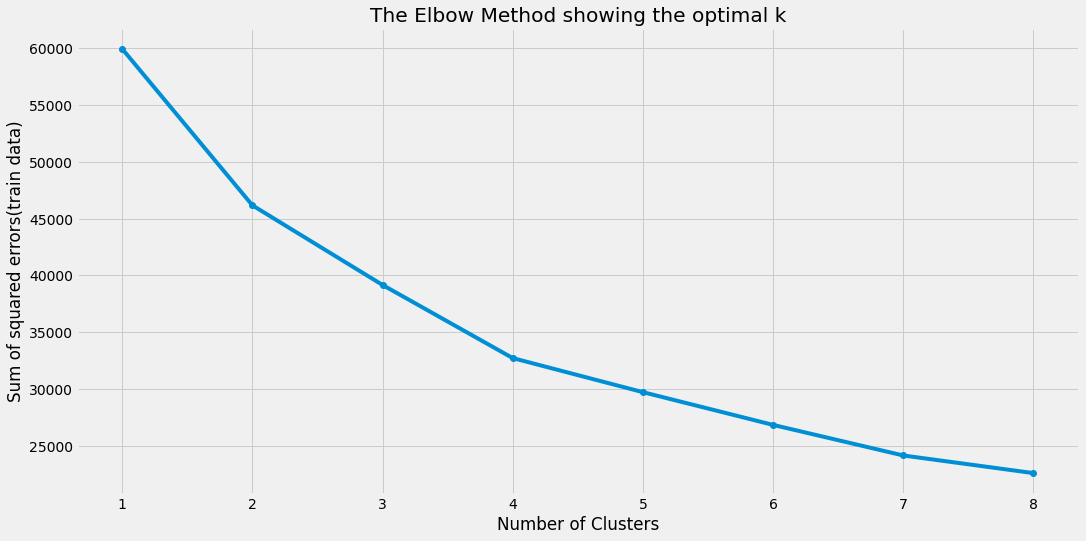

In [47]:
#plotting a graph between Sum of Squared Errors (SSE) and number of clusters (K)  for train data
ce = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_scaled)
    ce.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, ce, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors(train data)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the above graph we can conclude that difference of the curve between 4 and 5 is lower so we consider the value 4 for the number of clusters is better model.





In [48]:
#from kneed importing kneelocator to know the best cluster 
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), cs, curve="convex", direction="decreasing" )
kl.elbow

4

we got 4 from the kneelocator as the best no. of cluster

3) Use the cluster centers learned from the train data to cluster the test data. A test instance is assigned to the nearest cluster center learned from the train data.Use the same K values in the previous exercise and plot test data SSE versus K.

In [12]:
# from function getSSE be applied to test data to obtain test data SSE for cluster centers obtained from train data
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)
dists = model.transform(X_test_scaled)
getSSE('test', dists)

sum of squared dist: test 30268.393814781466
mean squared dist: test 8.078034111230709


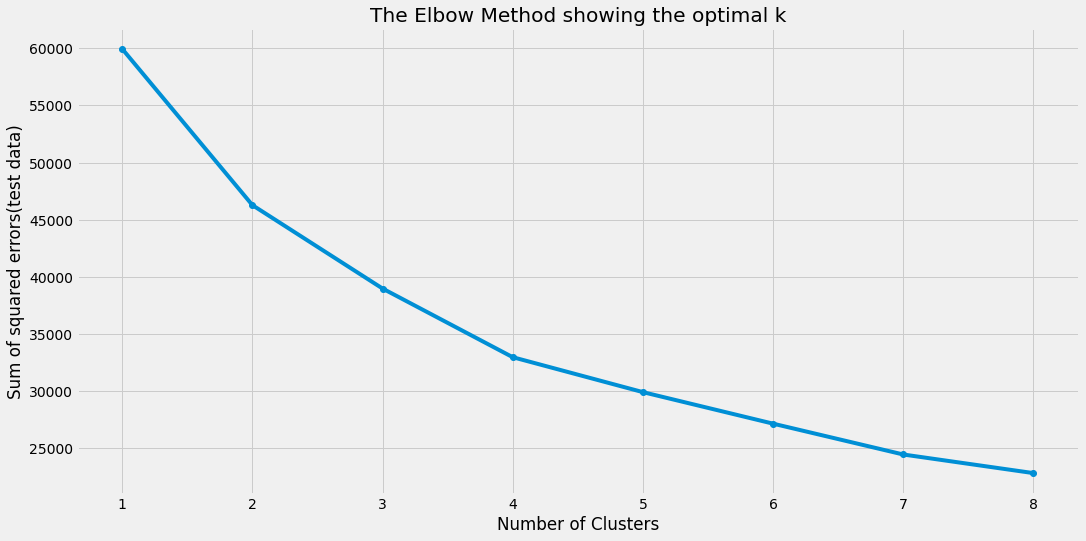

In [63]:
#plotting a graph between Sum of Squared Errors (SSE) and number of clusters (K)  for test data
sse = []
K = range(1,9)
for k in K:
    kmeanModel_test = KMeans(n_clusters=k)
    kmeanModel_test.fit(X_test_scaled)
    sse.append(kmeanModel_test.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, sse, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors(test data)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

4) Comment on the K you recommend from the test data SSE plot. Comment on any
differences from the train and test SSE plots.

From the above graph we can conclude that difference of the curve between 4 and 5 is lower so we consider the value 4 for the number of clusters is better model.

In [26]:
#from kneed importing kneelocator to know the best cluster 
from kneed import KneeLocator
kl1 = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing" )
kl1.elbow

4

we got 4 from the kneelocator as the best no. of cluster.

There is no difference between train data SSE and test data SSE because we splitted the dataset into 50-50%.

Calculating the accuracy for clusters by which number of cluster to be considered.

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(X_train_scaled)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(labels.size)))

Result: 3466 out of 3747 samples were correctly labeled.
Accuracy score: 0.93


In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X_train_scaled)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(labels.size)))

Result: 6227 out of 3747 samples were correctly labeled.
Accuracy score: 1.66


After calculating the accuracy :
Got higher accuracy for number of clusters is equal to 4.